# CS350 Homework 7

### a)


# of Mids	Runtime(s)
----------------------------------------
1		11.730587000000014
2		22.325095000000147
3		32.83947799999987
4		43.61795799999891
5		54.18749600000001
6		64.78217700000005
7		75.43684499999972
8		86.14545799999996
9		96.89164200000005
10		107.41022100000009


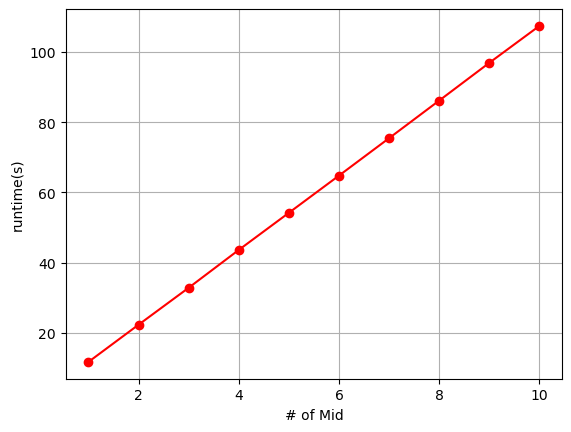

In [33]:
import matplotlib.pyplot as plt
def calculate_runtime(path):
    with open(path, 'r') as file:
        time_start = 0
        time_end = 0
        for line in file:
            if line.startswith("starting"):
                time_start = float(line.split(": ")[1])
            if line.startswith("ending"):
                time_end = float(line.split(": ")[1])
        return time_end - time_start  
def calculate_all_runtime(path, i, j):
    runtimes = []
    for i in range(1, j+1):
        file = path + str(i) + ".txt"
        runtime = calculate_runtime(file)
        runtimes.append(runtime)
    return runtimes
  
path_a = './data/s_a'
x = [i for i in range(1,11)]
runtimes_a = calculate_all_runtime(path_a, 1, 10)

print("# of Mids\tRuntime(s)")
print("-"*40)
for i in range(len(x)):
    print(f"{x[i]}\t\t{runtimes_a[i]}")
plt.plot(x, runtimes_a, color='red', marker='o', label="-w 1")
plt.xlabel('# of Mid')
plt.ylabel('runtime(s)')
plt.grid()
plt.show()
    

### b)

With multi-threading, based on the speedup from the graph below, the time it takes to process the requests would be less.

# of Mids	Runtime -w 1		Runtime -w 10		Speedup
-------------------------------------------------------------------------------------
1		11.730587000000014	5.797151999999187	2.0235086125051853
2		22.325095000000147	9.61306599999989	2.32236988698511
3		32.83947799999987	13.429075999998531	2.4454011579056862
4		43.61795799999891	17.337493000000904	2.515816906169573
5		54.18749600000001	21.204438000000664	2.555478999254699
6		64.78217700000005	25.080283999999665	2.5829921622897456
7		75.43684499999972	28.929527000000235	2.6076072726664044
8		86.14545799999996	32.77327800000057	2.6285273630546953
9		96.89164200000005	36.72775100000035	2.638104413199684
10		107.41022100000009	40.56288599999971	2.6479925762678933


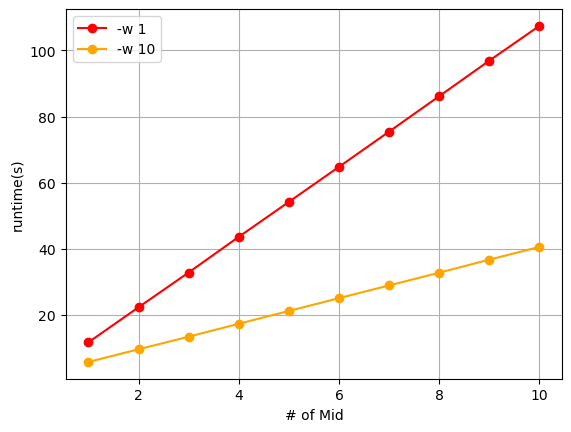

In [34]:
path_b = './data/s_b'
x = [i for i in range(1,11)]
runtimes_b = calculate_all_runtime(path_b, 1, 10)

print("# of Mids\tRuntime -w 1\t\tRuntime -w 10\t\tSpeedup")
print("-"*85)
for i in range(len(x)):
    print(f"{x[i]}\t\t{runtimes_a[i]}\t{runtimes_b[i]}\t{runtimes_a[i]/runtimes_b[i]}")
plt.plot(x, runtimes_a, color='red', marker='o', label="-w 1")
plt.xlabel('# of Mid')
plt.ylabel('runtime(s)')
plt.plot(x, runtimes_b, color='orange', marker='o', label="-w 10")
plt.grid()
plt.legend()
plt.show()

### c)

The additional speedup is shown from the graph below. 

The additional improvement is because in part b since each 10 thread is processing on the same image, as the requests in each line of command are processing the same image, each thread has to wait for each other to align the ordering, there would be some extra waiting time. However, in part c, since the requests in each line of command are processing different images in parallel, each thread has a reduced chance of waiting other threads due to request ordering.

# of Mids	Runtime -w 1		Runtime -w 10		Runtime -w 10(c)	Additional Speedup
--------------------------------------------------------------------------------------------------------------
1		11.730587000000014	5.797151999999187	4.307592999999542	1.3457984540321712
2		22.325095000000147	9.61306599999989	7.574340999999549	1.2691620300697397
3		32.83947799999987	13.429075999998531	10.767828000000009	1.2471480785167186
4		43.61795799999891	17.337493000000904	14.005564999999478	1.2379002917769866
5		54.18749600000001	21.204438000000664	17.830485000000408	1.1892238489306477
6		64.78217700000005	25.080283999999665	21.246022999999695	1.1804695871787405
7		75.43684499999972	28.929527000000235	24.77232599999934	1.1678163366653986
8		86.14545799999996	32.77327800000057	28.077344999999696	1.167249894888599
9		96.89164200000005	36.72775100000035	31.385824999999386	1.1702018666070135
10		107.41022100000009	40.56288599999971	33.83137499999975	1.198972433133445


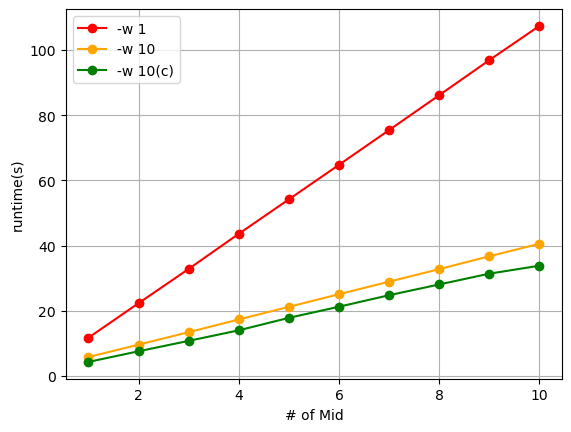

In [43]:
path_c = './data/s_c'
x = [i for i in range(1,11)]
runtimes = calculate_all_runtime(path_c, 1, 10)

print("# of Mids\tRuntime -w 1\t\tRuntime -w 10\t\tRuntime -w 10(c)\tAdditional Speedup")
print("-"*110)
for i in range(len(x)):
    print(f"{x[i]}\t\t{runtimes_a[i]}\t{runtimes_b[i]}\t{runtimes[i]}\t{runtimes_b[i]/runtimes[i]}")
plt.plot(x, runtimes_a, color='red', marker='o', label="-w 1")
plt.xlabel('# of Mid')
plt.ylabel('runtime(s)')
plt.plot(x, runtimes_b, color='orange', marker='o', label="-w 10")
plt.plot(x, runtimes, color='green', marker='o', label="-w 10(c)")
plt.xlabel('# of Mid')
plt.ylabel('runtime(s)')
plt.grid()
plt.legend()
plt.show()

### d)

The schedule policy should be if the image of the request required is currently processed by the other thread, we should pick the next image which is not processed by any threads so that we can reduce the wait time and let all threads work in parallel. If the image of the request required is not processed by any thread, the thread can process the image operation of the image.